This notebook utilizes libraries like `pandas` for data manipulation, `matplotlib`, `seaborn`, and `plotly` for static and interactive visualizations, and `nltk` for text preprocessing tasks such as sentence tokenization. Warnings are suppressed for cleaner output using `warnings.filterwarnings("ignore")`.

In [1]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import sent_tokenize
import nltk
import warnings

import plotly.express as px
import plotly.io as pio

warnings.filterwarnings("ignore")

The `nltk.download('punkt')` command downloads the Punkt tokenizer models, which are pre-trained data required by NLTK to tokenize text into sentences or words. These models enable functions like `sent_tokenize` and `word_tokenize` to split text accurately. Ensure to run this command during setup to preprocess text effectively.

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

This step ensures the SAMSum dataset is loaded into memory and ready for further exploration, such as data inspection, cleaning, and preprocessing for summarization tasks.or summarization tasks.or summarization tasks.

In [3]:
train_file = "/kaggle/input/samsum-dataset-text-summarization/samsum-train.csv"
df = pd.read_csv(train_file)

df

id                                           dialogue  \
0      13818513  Amanda: I baked  cookies. Do you want some?\r\...   
1      13728867  Olivia: Who are you voting for in this electio...   
2      13681000  Tim: Hi, what's up?\r\nKim: Bad mood tbh, I wa...   
3      13730747  Edward: Rachel, I think I'm in ove with Bella....   
4      13728094  Sam: hey  overheard rick say something\r\nSam:...   
...         ...                                                ...   
14727  13863028  Romeo: You are on my ‘People you may know’ lis...   
14728  13828570  Theresa: <file_photo>\r\nTheresa: <file_photo>...   
14729  13819050  John: Every day some bad news. Japan will hunt...   
14730  13828395  Jennifer: Dear Celia! How are you doing?\r\nJe...   
14731  13729017  Georgia: are you ready for hotel hunting? We n...   

                                                 summary  
0      Amanda baked cookies and will bring Jerry some...  
1      Olivia and Olivier are voting for liberals in ...  
2      Kim may try the pomodoro technique recommended...  
3      Edward thinks he is in love with Bella. Rachel...  
4      Sam is confused, because he overheard Rick com...  
...                                                  ...  
14727  Romeo is trying to get Greta to add him to her...  
14728  Theresa is at work. She gets free food and fre...  
14729  Japan is going to hunt whales again. Island an...  
14730  Celia couldn't make it to the afternoon with t...  
14731  Georgia and Juliette are looking for a hotel i...  

[14732 rows x 3 columns]

If df contains data from the SAMSum dataset, you’ll see the first 5 rows, likely including columns such as dialogue and summary, which are essential for summarization tasks.

In [4]:
df.head()

id                                           dialogue  \
0  13818513  Amanda: I baked  cookies. Do you want some?\r\...   
1  13728867  Olivia: Who are you voting for in this electio...   
2  13681000  Tim: Hi, what's up?\r\nKim: Bad mood tbh, I wa...   
3  13730747  Edward: Rachel, I think I'm in ove with Bella....   
4  13728094  Sam: hey  overheard rick say something\r\nSam:...   

                                             summary  
0  Amanda baked cookies and will bring Jerry some...  
1  Olivia and Olivier are voting for liberals in ...  
2  Kim may try the pomodoro technique recommended...  
3  Edward thinks he is in love with Bella. Rachel...  
4  Sam is confused, because he overheard Rick com...

If df contains data from the SAMSum dataset, you’ll see the last 5 rows, likely including columns such as dialogue and summary, which are essential for summarization tasks.

In [5]:
df.tail()

id                                           dialogue  \
14727  13863028  Romeo: You are on my ‘People you may know’ lis...   
14728  13828570  Theresa: <file_photo>\r\nTheresa: <file_photo>...   
14729  13819050  John: Every day some bad news. Japan will hunt...   
14730  13828395  Jennifer: Dear Celia! How are you doing?\r\nJe...   
14731  13729017  Georgia: are you ready for hotel hunting? We n...   

                                                 summary  
14727  Romeo is trying to get Greta to add him to her...  
14728  Theresa is at work. She gets free food and fre...  
14729  Japan is going to hunt whales again. Island an...  
14730  Celia couldn't make it to the afternoon with t...  
14731  Georgia and Juliette are looking for a hotel i...

If df contains the SAMSum dataset, you’ll see 5 randomly selected rows, which might include columns like dialogue (the conversational text) and summary (the corresponding generated summary).

In [6]:
df.sample(5)

id                                           dialogue  \
11912  13715763  Pam: hi! Would u like to drop by after work? \...   
5895   13862973  Greg: She wants me to send last year's payment...   
440    13818750  Tobias: Are you already in Belgrade?\r\nMary: ...   
10353  13717038  Dora: Sorry Kev, I cant come to the party\r\nD...   
5562   13682353  Roy: I'll come 2 u at 7\r\nGwen: ok, bring win...   

                                                 summary  
11912  Zoe and Tim are going to Pam's at 8. They will...  
5895   Greg needs to settle his payments before the e...  
440    Albert and Mary are in Belgrade, but they have...  
10353  Dora can't come to the party. Her mother is si...  
5562   Roy will visit Gwen at 7 and he'll bring some ...

The df.info() command in Pandas provides a concise summary of the DataFrame, giving you an overview of its structure and data. It is particularly useful for understanding the dataset at a glance.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14732 entries, 0 to 14731
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        14732 non-null  object
 1   dialogue  14731 non-null  object
 2   summary   14732 non-null  object
dtypes: object(3)
memory usage: 345.4+ KB


# Data Cleaning

The line df.isna().sum() checks for missing values in each column of the DataFrame df. It returns the total count of NaN (Not a Number) or missing values per column, helping identify where data cleaning is needed.

In [8]:
df.isna().sum()

id          0
dialogue    1
summary     0
dtype: int64

The line df = df.dropna() removes any rows from the DataFrame df that contain missing (NaN) values in any of the columns. After this operation, the DataFrame is updated to exclude those rows, ensuring that all remaining rows contain complete data.

In [9]:
df = df.dropna()

df

id                                           dialogue  \
0      13818513  Amanda: I baked  cookies. Do you want some?\r\...   
1      13728867  Olivia: Who are you voting for in this electio...   
2      13681000  Tim: Hi, what's up?\r\nKim: Bad mood tbh, I wa...   
3      13730747  Edward: Rachel, I think I'm in ove with Bella....   
4      13728094  Sam: hey  overheard rick say something\r\nSam:...   
...         ...                                                ...   
14727  13863028  Romeo: You are on my ‘People you may know’ lis...   
14728  13828570  Theresa: <file_photo>\r\nTheresa: <file_photo>...   
14729  13819050  John: Every day some bad news. Japan will hunt...   
14730  13828395  Jennifer: Dear Celia! How are you doing?\r\nJe...   
14731  13729017  Georgia: are you ready for hotel hunting? We n...   

                                                 summary  
0      Amanda baked cookies and will bring Jerry some...  
1      Olivia and Olivier are voting for liberals in ...  
2      Kim may try the pomodoro technique recommended...  
3      Edward thinks he is in love with Bella. Rachel...  
4      Sam is confused, because he overheard Rick com...  
...                                                  ...  
14727  Romeo is trying to get Greta to add him to her...  
14728  Theresa is at work. She gets free food and fre...  
14729  Japan is going to hunt whales again. Island an...  
14730  Celia couldn't make it to the afternoon with t...  
14731  Georgia and Juliette are looking for a hotel i...  

[14731 rows x 3 columns]

Counts the number of missing values (NaN) in each column of the DataFrame df.

In [10]:
df.isna().sum()

id          0
dialogue    0
summary     0
dtype: int64

Installs the contractions library, which is used to expand contracted words (e.g., "I'm" to "I am") in text, useful for text preprocessing in natural language processing (NLP) tasks.

In [11]:
!pip install contractions

The code imports several libraries: re for regular expressions, spacy for natural language processing tasks, emoji for handling emojis, and fix from the contractions library to expand contractions. It loads the English language model from spacy for text processing. Two functions are defined for cleaning text: clean_dialogue processes the dialogue by removing special tags, replacing newlines with spaces, converting text to lowercase, expanding contractions, demojizing emojis, and lemmatizing the text, while clean_summary cleans the summary by removing extra spaces, replacing newlines, and expanding contractions. These functions are then applied to the "dialogue" and "summary" columns of the DataFrame df, and the cleaned versions are stored in new columns cleaned_dialogue and cleaned_summary, respectively.

In [12]:
import re
import spacy
import emoji
from contractions import fix

nlp = spacy.load("en_core_web_sm")

# Clean Dialogue (Input)
def clean_dialogue(dialogue):
    dialogue = re.sub(r"<.*?>", "", dialogue)  # Remove special tags
    dialogue = re.sub(r"\\r\\n", " ", dialogue)  # Replace newlines
    dialogue = re.sub(r"\s+", " ", dialogue).strip()  # Remove extra spaces
    dialogue = dialogue.lower()  # Convert to lowercase
    dialogue = fix(dialogue)  # Expand contractions
    dialogue = emoji.demojize(dialogue)  # Convert emojis to text
    doc = nlp(dialogue)
    dialogue = " ".join([token.lemma_ for token in doc if not token.is_punct])  # Lemmatize
    return dialogue

# Clean Summary (Label)
def clean_summary(summary):
    summary = re.sub(r"\s+", " ", summary).strip()  # Remove extra spaces
    summary = re.sub(r"\\r\\n", " ", summary)  # Replace newlines
    summary = fix(summary)  # Expand contractions
    return summary

# Apply Cleaning
df["cleaned_dialogue"] = df["dialogue"].apply(clean_dialogue)
df["cleaned_summary"] = df["summary"].apply(clean_summary)

The command df simply displays the contents of the DataFrame df in a Jupyter notebook or a Kaggle environment. It shows the dataset with its columns and rows, including any transformations or modifications applied to it.

In [13]:
df

id                                           dialogue  \
0      13818513  Amanda: I baked  cookies. Do you want some?\r\...   
1      13728867  Olivia: Who are you voting for in this electio...   
2      13681000  Tim: Hi, what's up?\r\nKim: Bad mood tbh, I wa...   
3      13730747  Edward: Rachel, I think I'm in ove with Bella....   
4      13728094  Sam: hey  overheard rick say something\r\nSam:...   
...         ...                                                ...   
14727  13863028  Romeo: You are on my ‘People you may know’ lis...   
14728  13828570  Theresa: <file_photo>\r\nTheresa: <file_photo>...   
14729  13819050  John: Every day some bad news. Japan will hunt...   
14730  13828395  Jennifer: Dear Celia! How are you doing?\r\nJe...   
14731  13729017  Georgia: are you ready for hotel hunting? We n...   

                                                 summary  \
0      Amanda baked cookies and will bring Jerry some...   
1      Olivia and Olivier are voting for liberals in ...   
2      Kim may try the pomodoro technique recommended...   
3      Edward thinks he is in love with Bella. Rachel...   
4      Sam is confused, because he overheard Rick com...   
...                                                  ...   
14727  Romeo is trying to get Greta to add him to her...   
14728  Theresa is at work. She gets free food and fre...   
14729  Japan is going to hunt whales again. Island an...   
14730  Celia couldn't make it to the afternoon with t...   
14731  Georgia and Juliette are looking for a hotel i...   

                                        cleaned_dialogue  \
0      amanda I bake cookie do you want some jerry su...   
1      olivia who be you vote for in this election ol...   
2      tim hi what be up kim bad mood to be honest I ...   
3      edward rachel I think I be in ove with bella r...   
4      sam hey overheard rick say something sam I do ...   
...                                                  ...   
14727  romeo you be on my people you may know list gr...   
14728  theresa theresa theresa hey louise how be you ...   
14729  john every day some bad news japan will hunt w...   
14730  jennifer dear celia how be you do jennifer the...   
14731  georgia be you ready for hotel hunting we need...   

                                         cleaned_summary  
0      Amanda baked cookies and will bring Jerry some...  
1      Olivia and Olivier are voting for liberals in ...  
2      Kim may try the pomodoro technique recommended...  
3      Edward thinks he is in love with Bella. Rachel...  
4      Sam is confused, because he overheard Rick com...  
...                                                  ...  
14727  Romeo is trying to get Greta to add him to her...  
14728  Theresa is at work. She gets free food and fre...  
14729  Japan is going to hunt whales again. Island an...  
14730  Celia could not make it to the afternoon with ...  
14731  Georgia and Juliette are looking for a hotel i...  

[14731 rows x 5 columns]

The code defines three functions to compute text features: word_count, unique_word_count, and avg_word_length. These functions calculate the total number of words, the number of unique words, and the average length of words in a text, respectively. Then, the code applies these functions to the cleaned dialogue and summary columns of the DataFrame df and stores the results in new columns:

dialogue_word_count: The total word count of the cleaned dialogue.
summary_word_count: The total word count of the cleaned summary.
dialogue_unique_word_count: The number of unique words in the cleaned dialogue.
summary_unique_word_count: The number of unique words in the cleaned summary.
dialogue_avg_word_length: The average word length in the cleaned dialogue.
summary_avg_word_length: The average word length in the cleaned summary.

In [14]:
# Function to calculate word count
def word_count(text):
    return len(text.split())
def char_count(text):
    return len(text)

# Function to calculate unique word count
def unique_word_count(text):
    return len(set(text.split()))

# Function to calculate average word length
def avg_word_length(text):
    words = text.split()
    if len(words) > 0:
        return sum(len(word) for word in words) / len(words)
    else:
        return 0

# Add columns to the DataFrame
df['dialogue_word_count'] = df['cleaned_dialogue'].apply(word_count)
df['summary_word_count'] = df['cleaned_summary'].apply(word_count)
df['dialogue_char_count'] = df['cleaned_dialogue'].apply(char_count)
df['summary_char_count'] = df['cleaned_summary'].apply(char_count)

df['dialogue_unique_word_count'] = df['cleaned_dialogue'].apply(unique_word_count)
df['summary_unique_word_count'] = df['cleaned_summary'].apply(unique_word_count)

df['dialogue_avg_word_length'] = df['cleaned_dialogue'].apply(avg_word_length)
df['summary_avg_word_length'] = df['cleaned_summary'].apply(avg_word_length)

df.head()

id                                           dialogue  \
0  13818513  Amanda: I baked  cookies. Do you want some?\r\...   
1  13728867  Olivia: Who are you voting for in this electio...   
2  13681000  Tim: Hi, what's up?\r\nKim: Bad mood tbh, I wa...   
3  13730747  Edward: Rachel, I think I'm in ove with Bella....   
4  13728094  Sam: hey  overheard rick say something\r\nSam:...   

                                             summary  \
0  Amanda baked cookies and will bring Jerry some...   
1  Olivia and Olivier are voting for liberals in ...   
2  Kim may try the pomodoro technique recommended...   
3  Edward thinks he is in love with Bella. Rachel...   
4  Sam is confused, because he overheard Rick com...   

                                    cleaned_dialogue  \
0  amanda I bake cookie do you want some jerry su...   
1  olivia who be you vote for in this election ol...   
2  tim hi what be up kim bad mood to be honest I ...   
3  edward rachel I think I be in ove with bella r...   
4  sam hey overheard rick say something sam I do ...   

                                     cleaned_summary  dialogue_word_count  \
0  Amanda baked cookies and will bring Jerry some...                   16   
1  Olivia and Olivier are voting for liberals in ...                   18   
2  Kim may try the pomodoro technique recommended...                  105   
3  Edward thinks he is in love with Bella. Rachel...                   29   
4  Sam is confused, because he overheard Rick com...                  190   

   summary_word_count  dialogue_char_count  summary_char_count  \
0                   9                   81                  56   
1                  10                   94                  60   
2                  14                  484                  77   
3                  18                  143                  96   
4                  27                  819                 145   

   dialogue_unique_word_count  summary_unique_word_count  \
0                          13                          9   
1                          16                         10   
2                          65                         14   
3                          22                         15   
4                          81                         23   

   dialogue_avg_word_length  summary_avg_word_length  
0                  4.125000                 5.333333  
1                  4.277778                 5.100000  
2                  3.619048                 4.571429  
3                  3.965517                 4.388889  
4                  3.315789                 4.407407

# Data Visualization

The code generates a series of histograms to visualize various text features in the DataFrame df, including word counts, character counts, and average word lengths for both the dialogue and summary columns. It starts by defining a list of columns to visualize and assigns distinct colors to each plot using Seaborn's husl palette. A grid of subplots (4 rows, 2 columns) is created, and a histogram with a Kernel Density Estimate (KDE) is plotted for each feature. The loop iterates through each feature, customizing the titles and axis labels for each subplot. Any empty subplots are removed if there are fewer columns than subplots. Finally, the layout is adjusted to ensure proper spacing and the grid of histograms is displayed, providing a clear and visually distinct comparison of the features.

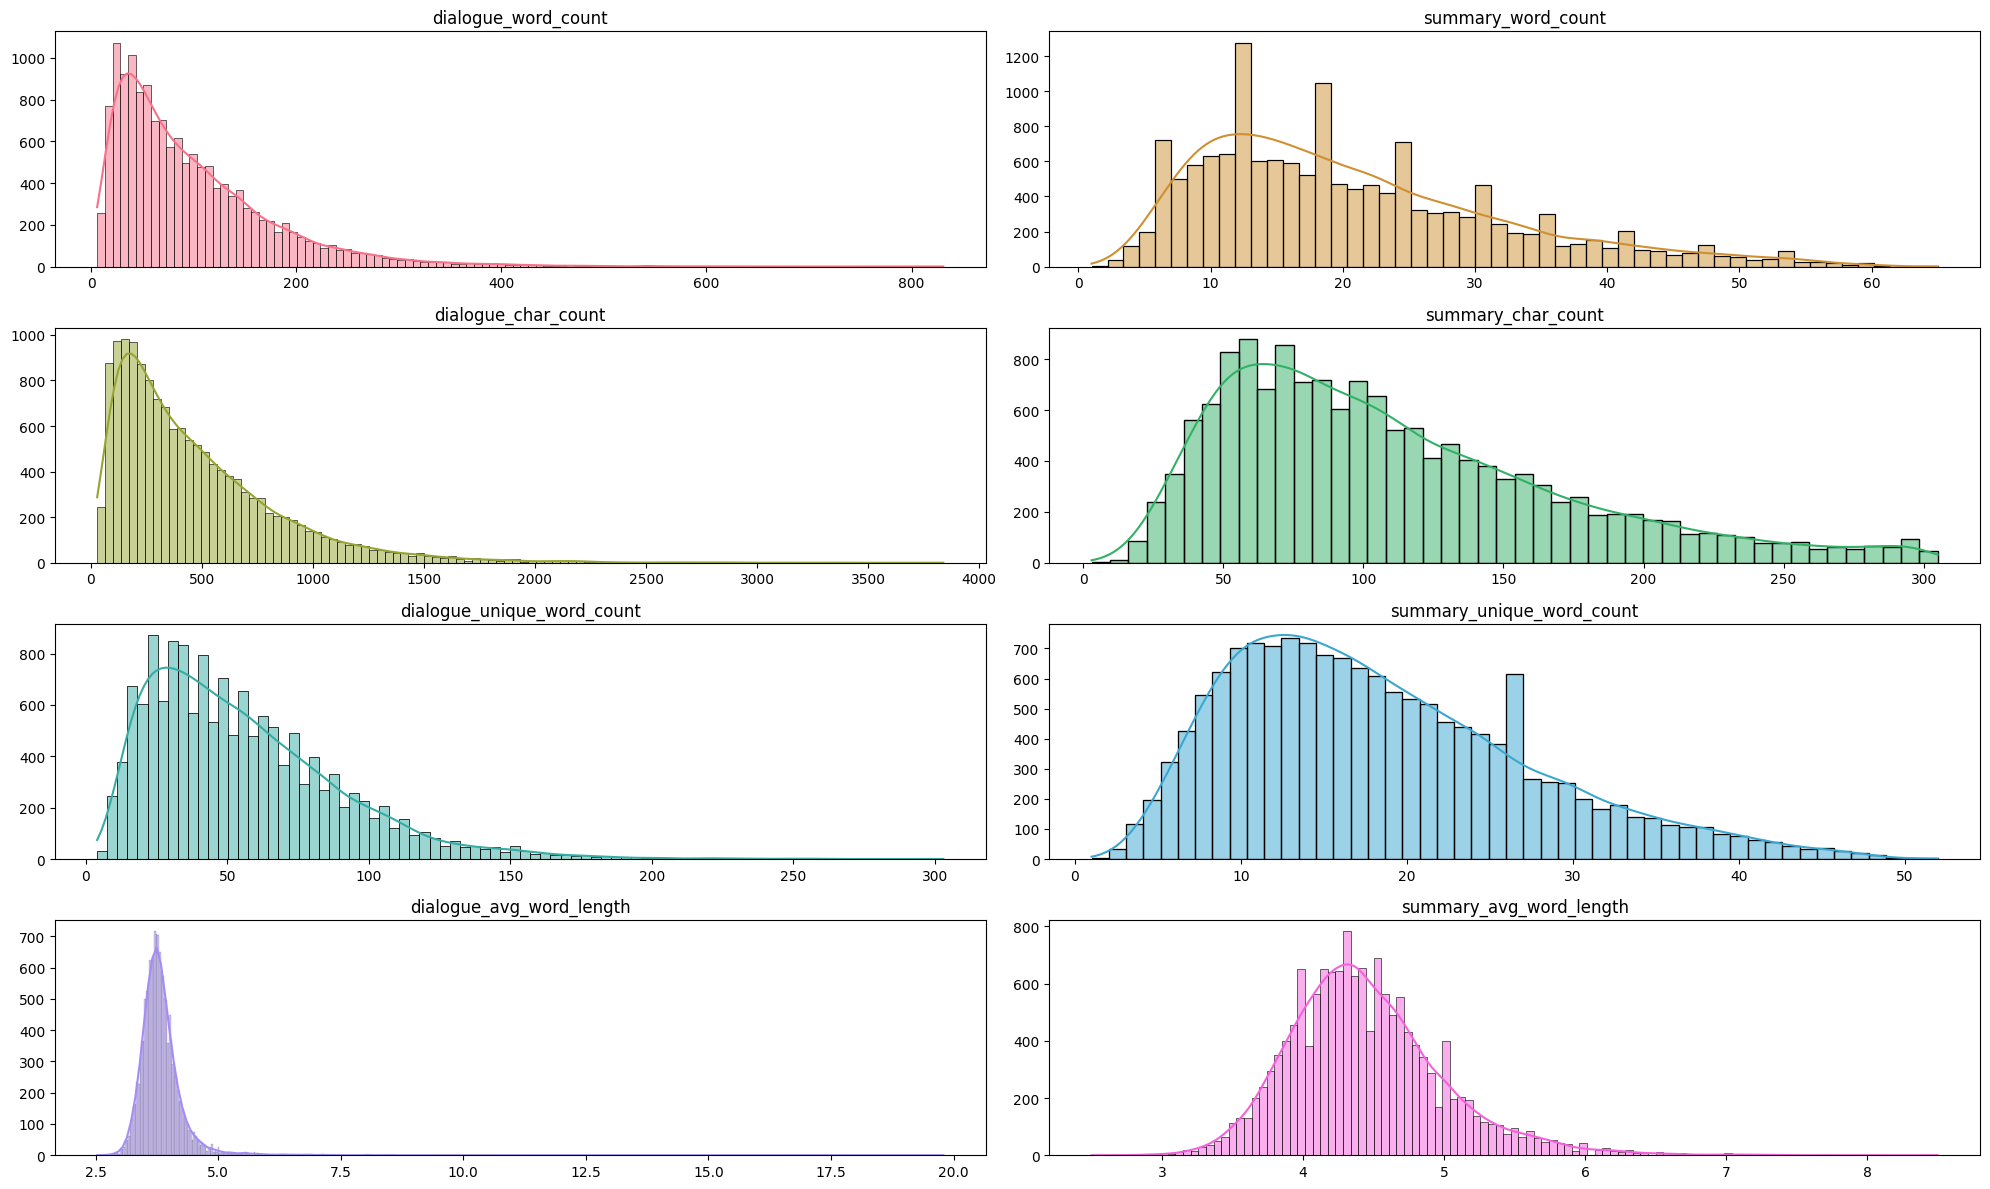

In [15]:
columns = [
    "dialogue_word_count", "summary_word_count", "dialogue_char_count", "summary_char_count", "dialogue_unique_word_count", "summary_unique_word_count", 

    "dialogue_avg_word_length","summary_avg_word_length"
]

# Define a list of unique colors (length should match or exceed the number of columns)
colors = sns.color_palette("husl", len(columns))  # 'husl' generates visually distinct colors

fig, axes = plt.subplots(4, 2, figsize=(20, 12))
axes = axes.flatten()

# Plot each column in the grid
for i, column in enumerate(columns):
    sns.histplot(df[column], kde=True, ax=axes[i], color=colors[i])
    axes[i].set_title(column)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Remove any empty subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

The code creates a series of horizontal box plots to visualize the distribution of various text features in the DataFrame `df`, including word counts, character counts, and average word lengths for both dialogue and summary columns. It starts by defining a list of columns to be plotted and assigns distinct colors to each box plot using Seaborn's `husl` color palette. A grid of subplots (4 rows and 2 columns) is created, and for each column in the list, a box plot is generated. The `sns.boxplot` function is used to display the distribution of values for each feature, with the column name displayed as the y-axis label and a generic "Value" label for the x-axis. Any empty subplots are removed if there are fewer columns than subplots. Finally, the layout is adjusted to ensure proper spacing between the plots, and the resulting box plots are displayed, allowing for easy comparison of the distributions of the features.

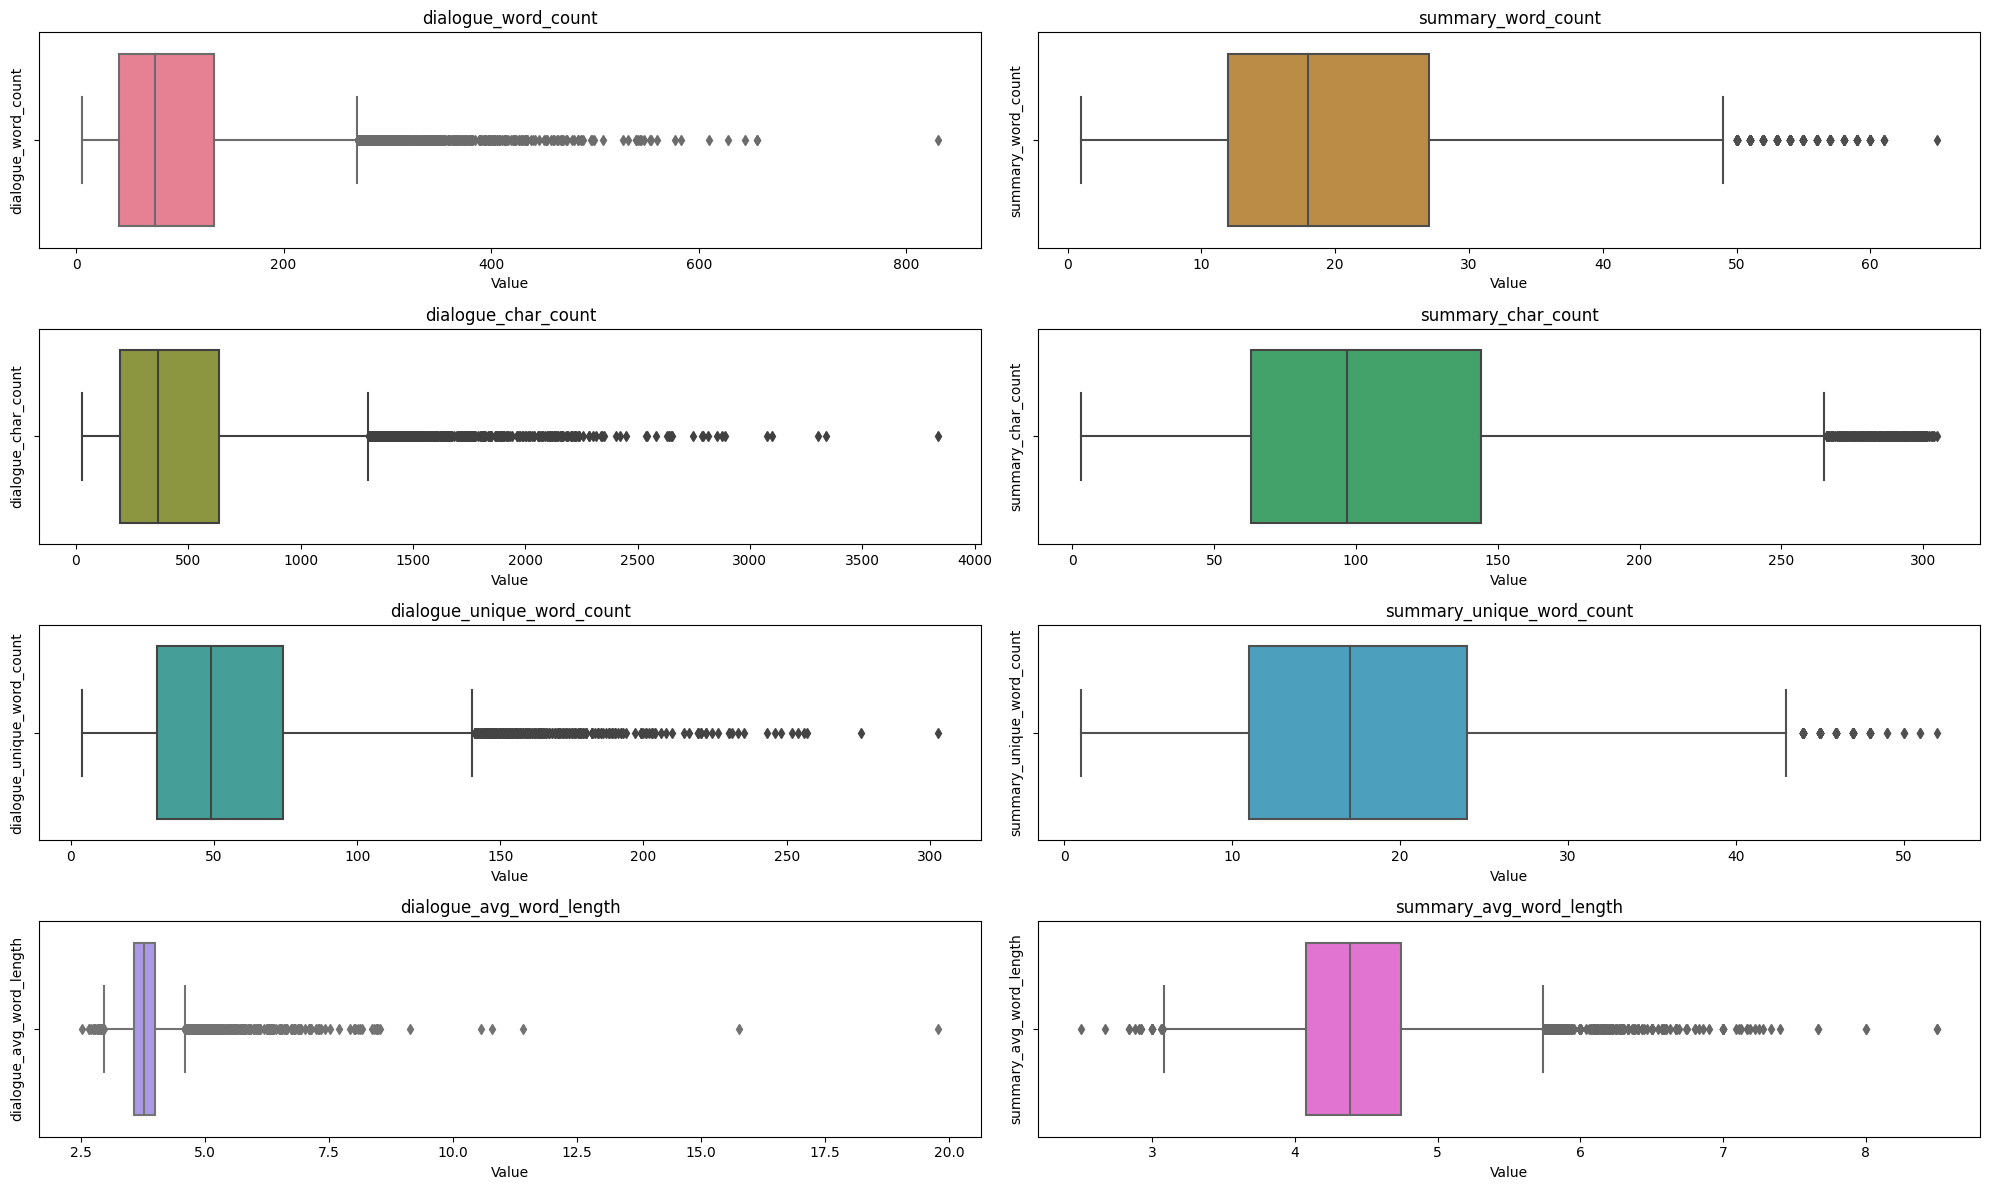

In [16]:
# Define a list of unique colors (length should match or exceed the number of columns)
colors = sns.color_palette("husl", len(columns))  # 'husl' generates visually distinct colors

fig, axes = plt.subplots(4, 2, figsize=(20, 12))
axes = axes.flatten()

# Plot each column in the grid
for i, column in enumerate(columns):
    sns.boxplot(data=df, x=column, ax=axes[i], color=colors[i])  # Set `x=column` for horizontal box plots
    axes[i].set_title(column)
    axes[i].set_xlabel("Value")  # Generic x-axis label for all plots
    axes[i].set_ylabel(column)  # Show the column name on the y-axis

# Remove any empty subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


The command `df.describe()` provides a summary of the numerical columns in the DataFrame `df`. It generates descriptive statistics such as:

- **Count**: The number of non-null entries in each column.
- **Mean**: The average value of each column.
- **Standard Deviation (std)**: The measure of the amount of variation or dispersion of values in each column.
- **Min**: The minimum value in each column.
- **25%** (1st Quartile): The value below which 25% of the data falls.
- **50%** (Median or 2nd Quartile): The middle value in the data set, where half the values are above and half are below.
- **75%** (3rd Quartile): The value below which 75% of the data falls.
- **Max**: The maximum value in each column.

This function is typically used to get a quick overview of the distribution and central tendencies of numerical data in the dataset. It can help identify outliers or skewed distributions as well.

In [17]:
df.describe()

dialogue_word_count  summary_word_count  dialogue_char_count  \
count         14731.000000        14731.000000         14731.000000   
mean             97.486525           20.612246           469.638517   
std              77.133640           11.336521           374.227638   
min               6.000000            1.000000            28.000000   
25%              41.000000           12.000000           195.000000   
50%              76.000000           18.000000           366.000000   
75%             133.000000           27.000000           638.000000   
max             831.000000           65.000000          3839.000000   

       summary_char_count  dialogue_unique_word_count  \
count        14731.000000                14731.000000   
mean           110.365556                   55.579458   
std             61.099803                   33.922310   
min              3.000000                    4.000000   
25%             63.000000                   30.000000   
50%             97.000000                   49.000000   
75%            144.000000                   74.000000   
max            305.000000                  303.000000   

       summary_unique_word_count  dialogue_avg_word_length  \
count               14731.000000              14731.000000   
mean                   18.383952                  3.837791   
std                     8.949608                  0.481263   
min                     1.000000                  2.533333   
25%                    11.000000                  3.585446   
50%                    17.000000                  3.772414   
75%                    24.000000                  3.993610   
max                    52.000000                 19.789474   

       summary_avg_word_length  
count             14731.000000  
mean                  4.445219  
std                   0.550565  
min                   2.500000  
25%                   4.076923  
50%                   4.384615  
75%                   4.741935  
max                   8.500000

In [18]:
df

id                                           dialogue  \
0      13818513  Amanda: I baked  cookies. Do you want some?\r\...   
1      13728867  Olivia: Who are you voting for in this electio...   
2      13681000  Tim: Hi, what's up?\r\nKim: Bad mood tbh, I wa...   
3      13730747  Edward: Rachel, I think I'm in ove with Bella....   
4      13728094  Sam: hey  overheard rick say something\r\nSam:...   
...         ...                                                ...   
14727  13863028  Romeo: You are on my ‘People you may know’ lis...   
14728  13828570  Theresa: <file_photo>\r\nTheresa: <file_photo>...   
14729  13819050  John: Every day some bad news. Japan will hunt...   
14730  13828395  Jennifer: Dear Celia! How are you doing?\r\nJe...   
14731  13729017  Georgia: are you ready for hotel hunting? We n...   

                                                 summary  \
0      Amanda baked cookies and will bring Jerry some...   
1      Olivia and Olivier are voting for liberals in ...   
2      Kim may try the pomodoro technique recommended...   
3      Edward thinks he is in love with Bella. Rachel...   
4      Sam is confused, because he overheard Rick com...   
...                                                  ...   
14727  Romeo is trying to get Greta to add him to her...   
14728  Theresa is at work. She gets free food and fre...   
14729  Japan is going to hunt whales again. Island an...   
14730  Celia couldn't make it to the afternoon with t...   
14731  Georgia and Juliette are looking for a hotel i...   

                                        cleaned_dialogue  \
0      amanda I bake cookie do you want some jerry su...   
1      olivia who be you vote for in this election ol...   
2      tim hi what be up kim bad mood to be honest I ...   
3      edward rachel I think I be in ove with bella r...   
4      sam hey overheard rick say something sam I do ...   
...                                                  ...   
14727  romeo you be on my people you may know list gr...   
14728  theresa theresa theresa hey louise how be you ...   
14729  john every day some bad news japan will hunt w...   
14730  jennifer dear celia how be you do jennifer the...   
14731  georgia be you ready for hotel hunting we need...   

                                         cleaned_summary  dialogue_word_count  \
0      Amanda baked cookies and will bring Jerry some...                   16   
1      Olivia and Olivier are voting for liberals in ...                   18   
2      Kim may try the pomodoro technique recommended...                  105   
3      Edward thinks he is in love with Bella. Rachel...                   29   
4      Sam is confused, because he overheard Rick com...                  190   
...                                                  ...                  ...   
14727  Romeo is trying to get Greta to add him to her...                   58   
14728  Theresa is at work. She gets free food and fre...                  195   
14729  Japan is going to hunt whales again. Island an...                  147   
14730  Celia could not make it to the afternoon with ...                  288   
14731  Georgia and Juliette are looking for a hotel i...                  240   

       summary_word_count  dialogue_char_count  summary_char_count  \
0                       9                   81                  56   
1                      10                   94                  60   
2                      14                  484                  77   
3                      18                  143                  96   
4                      27                  819                 145   
...                   ...                  ...                 ...   
14727                  16                  277                  75   
14728                  38                 1104                 214   
14729                  22                  789                 137   
14730                  43                 1421           

# Data Correlations

The code generates a **pairplot** to visualize the relationships between the selected numerical columns in the DataFrame `df`. First, it creates a new DataFrame `correlation_data` by selecting only the relevant columns defined in the `columns` list. Then, using Seaborn's `pairplot` function, it creates a grid of scatterplots to explore how each pair of variables relates to one another, with Kernel Density Estimation (KDE) plots shown along the diagonal to visualize the distribution of individual variables. The transparency of the scatterplot markers is adjusted with `alpha=0.7`, and the marker size is set to `s=20`. Finally, `plt.show()` displays the resulting pairplot, allowing for a comprehensive exploration of correlations and trends within the data.

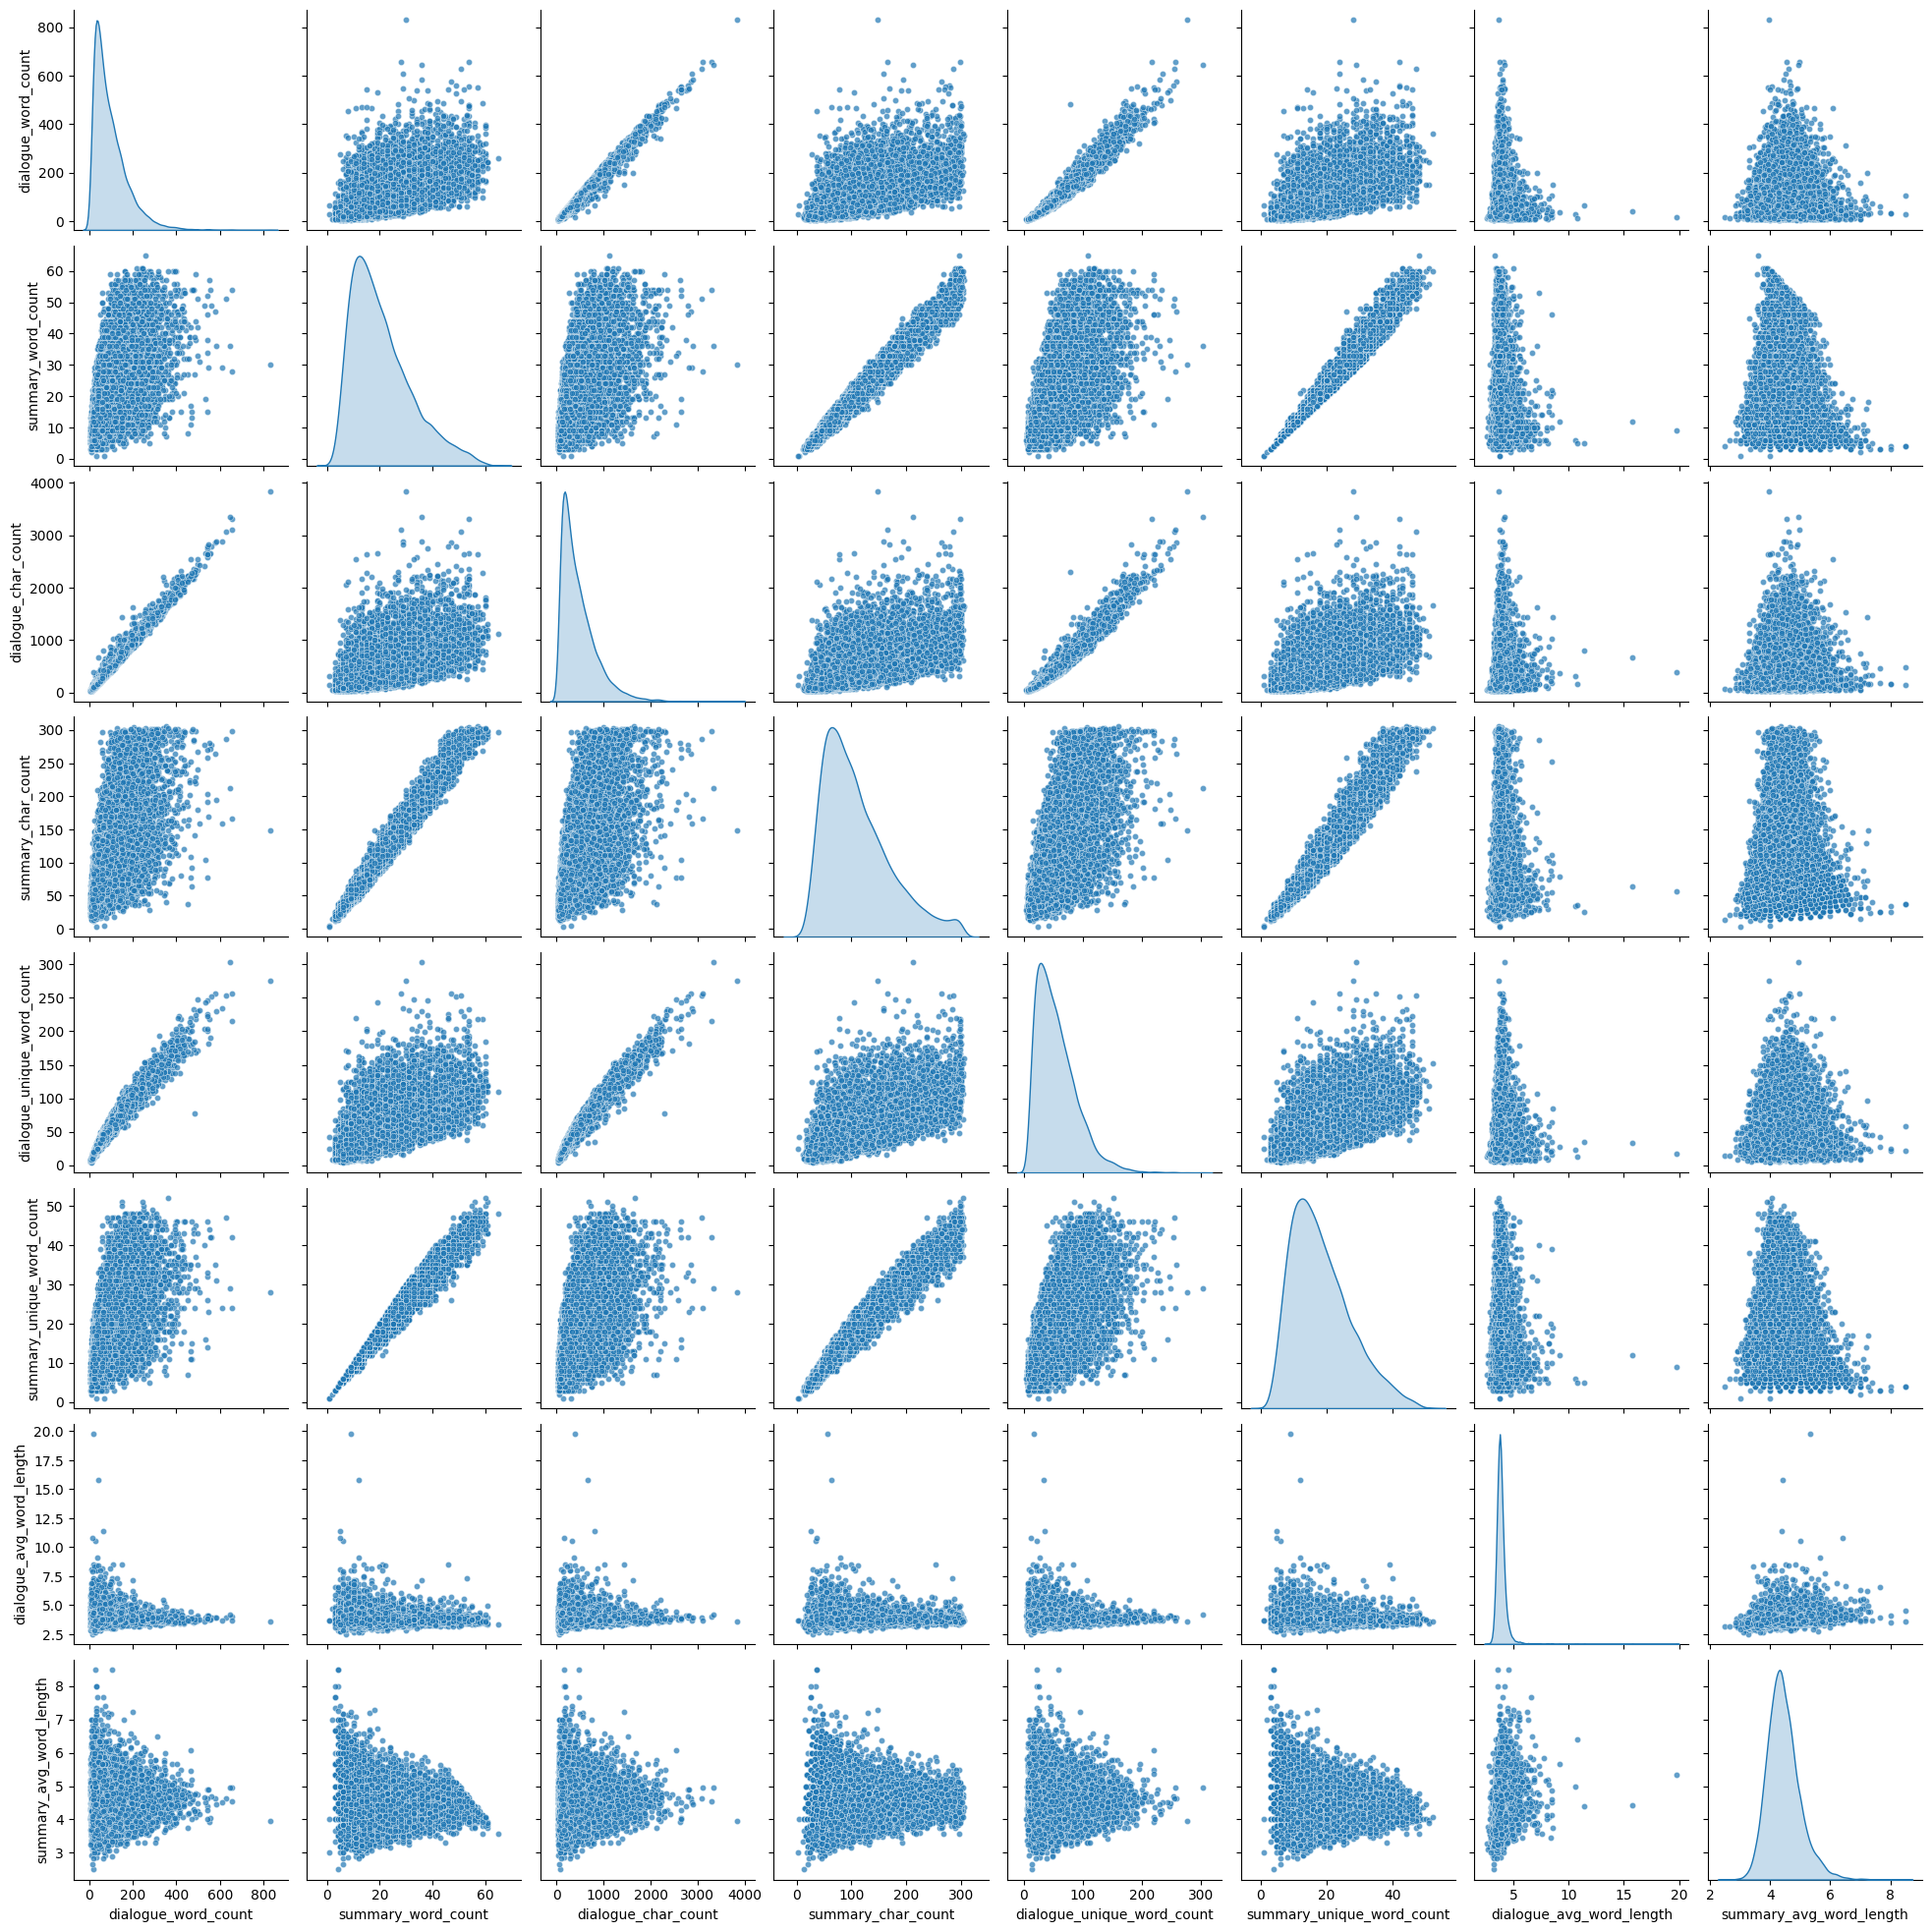

In [19]:
# Select only the relevant columns from the DataFrame
correlation_data = df[columns]

# Create a pairplot for the selected columns
sns.pairplot(correlation_data, diag_kind="kde", plot_kws={"alpha": 0.7, "s": 20})

# Show the plots
plt.show()

The code generates a **heatmap** to visualize the correlation matrix of the selected numerical columns in the DataFrame `df`. First, it calculates the correlation matrix using the `.corr()` method on the relevant columns, which computes the Pearson correlation coefficients between each pair of variables. The heatmap is then created using Seaborn's `heatmap` function, with annotations displaying the correlation values in each cell. The color scheme, `coolwarm`, is used to differentiate negative correlations (blue) from positive correlations (red), with a range from -1 to 1. The heatmap is square-shaped, and thin lines between cells are added for clarity. A title is set for the plot, and the figure is displayed using `plt.show()`. This visualization helps to easily identify the relationships between variables, highlighting strong correlations or patterns in the data.

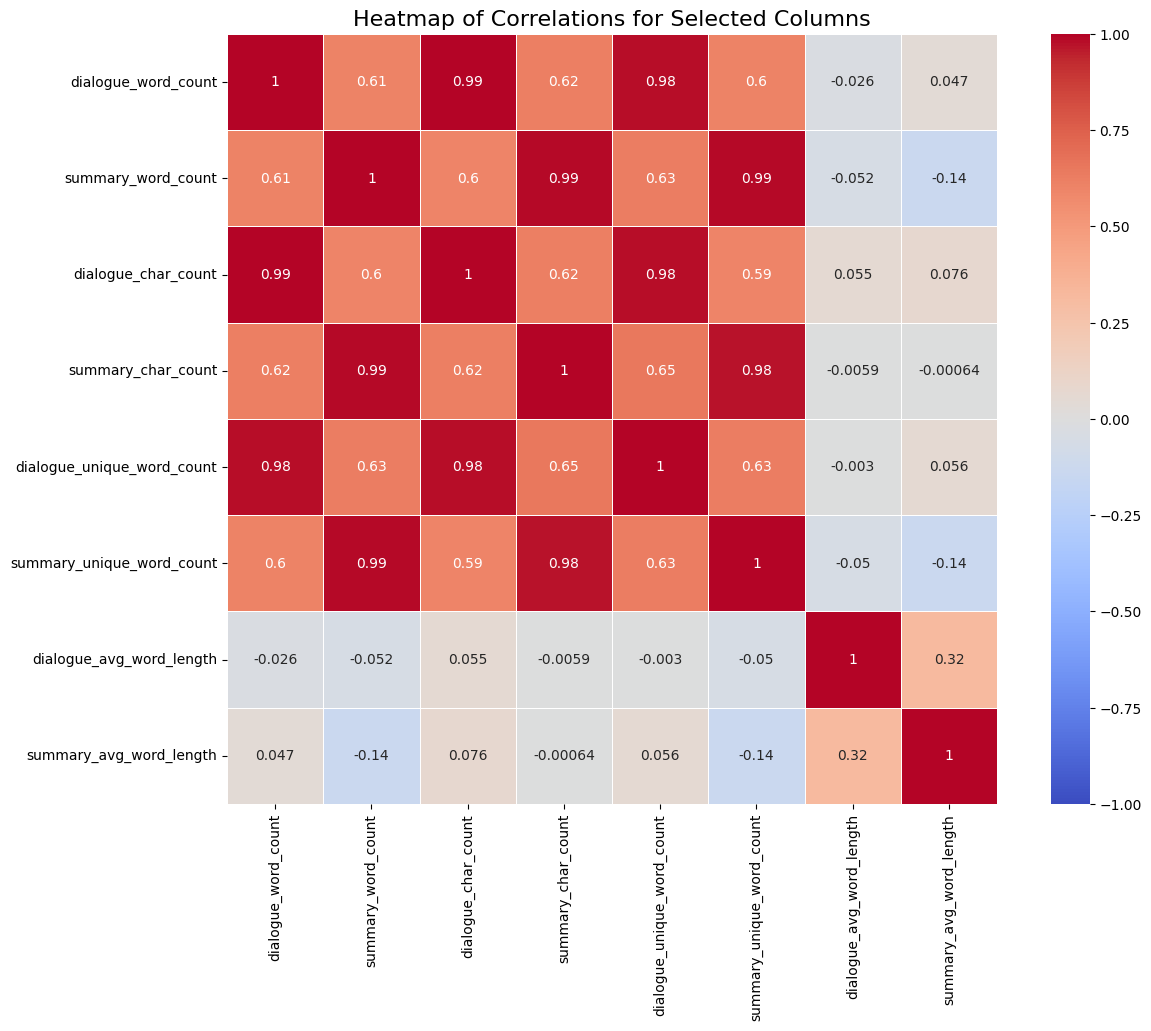

In [20]:
corr_data = df[columns].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title('Heatmap of Correlations for Selected Columns', fontsize=16)
plt.show()

The code generates a **word cloud** to visually represent the most frequent words in the cleaned dialogue text from the DataFrame `df`. It first combines all the cleaned dialogue entries into a single string and removes common stopwords using the default stopwords set from the `WordCloud` library. Then, the `WordCloud` class is used to create the word cloud with specified parameters, such as setting the background color to white, applying the 'viridis' colormap, limiting the display to the top 200 most frequent words, and adding a steel blue contour for emphasis. The resulting word cloud is displayed with smooth rendering and no axis, providing a clear visual of the most commonly used words in the dialogue data. This visualization helps to quickly identify key terms and themes within the text.

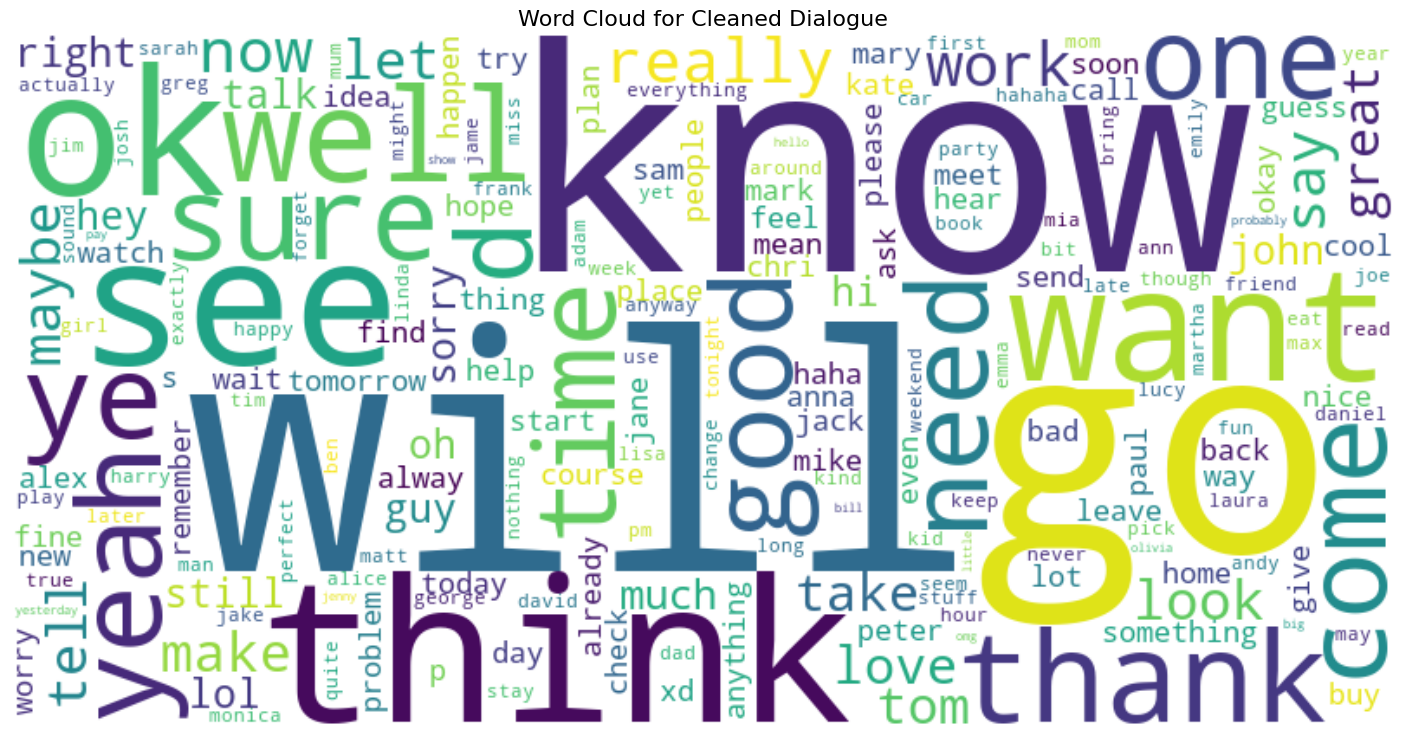

In [21]:
from wordcloud import WordCloud, STOPWORDS

all_dialogues = " ".join(df["cleaned_dialogue"])

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords,
    colormap='viridis',
    max_words=200,
    contour_width=1,
    contour_color='steelblue'
).generate(all_dialogues)

# Plot the word cloud
plt.figure(figsize=(20, 9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Cleaned Dialogue", fontsize=16)
plt.show()

The code generates a **word cloud** to visualize the most frequent words in the cleaned summary text from the DataFrame `df`. It first combines all the cleaned summaries into a single string and removes common stopwords using the default stopwords set from the `WordCloud` library. Then, the `WordCloud` class is used to generate the word cloud with several parameters, such as setting the background color to white, using the 'viridis' colormap, limiting the display to the top 200 most frequent words, and adding a steel blue contour for aesthetic enhancement. Finally, the word cloud is displayed with smooth rendering and no axis. This visualization highlights the most prominent terms in the summary data, providing insight into key concepts or themes from the summaries.

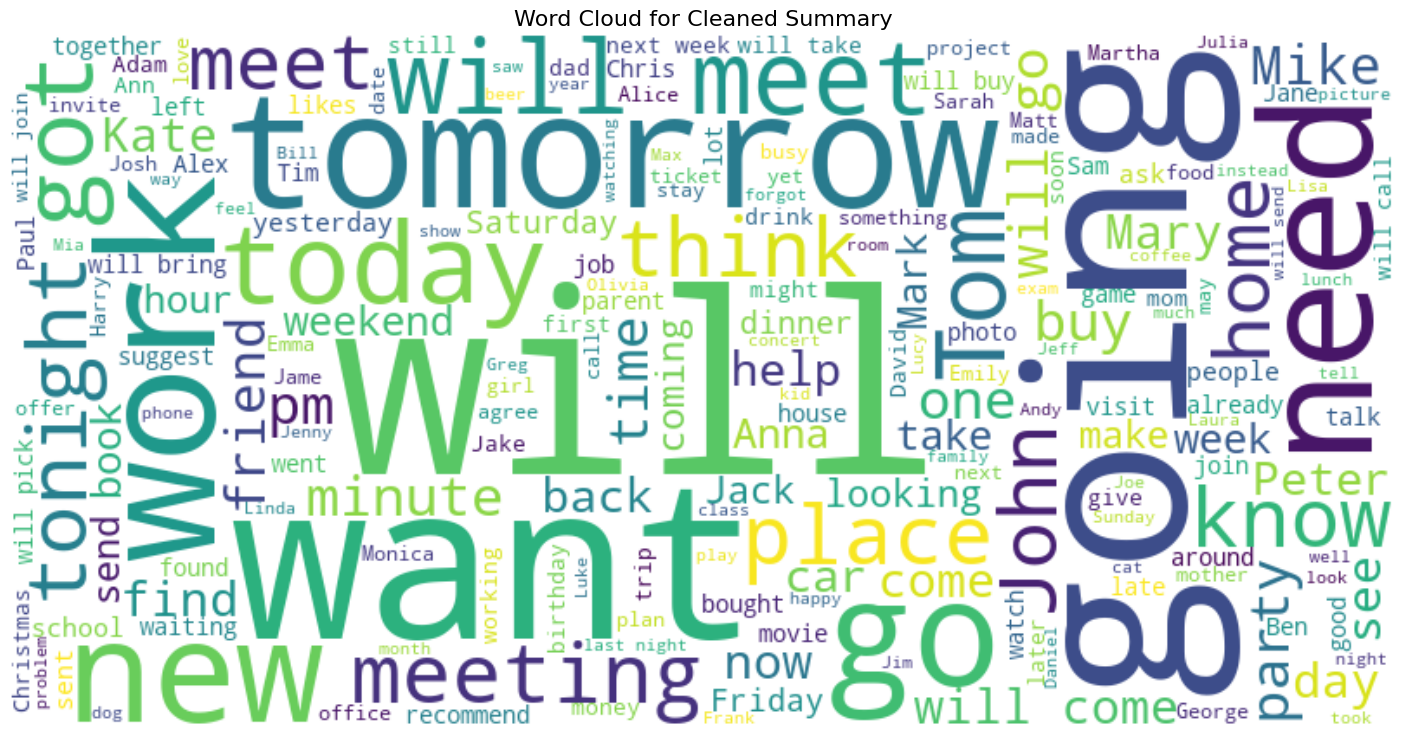

In [22]:
from wordcloud import WordCloud, STOPWORDS

all_dialogues = " ".join(df["cleaned_summary"])

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords,
    colormap='viridis',
    max_words=200,
    contour_width=1,
    contour_color='steelblue'
).generate(all_dialogues)

# Plot the word cloud
plt.figure(figsize=(20, 9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Cleaned Summary", fontsize=16)
plt.show()

The code generates a bigram word cloud to visualize the most frequent two-word combinations (bigrams) in the cleaned dialogue text from the DataFrame df. First, all the cleaned dialogues are combined into a single string, and stopwords are defined to filter out common words. Then, a CountVectorizer is used to extract bigrams (two-word combinations) from the text, and the frequency of each bigram is calculated. The top 200 bigrams with the highest frequencies are selected for the word cloud. The WordCloud class is used to generate a word cloud based on these bigram frequencies, with a visually distinct color palette and a smooth rendering. The resulting word cloud is displayed without axes, highlighting the most common bigrams in the dialogue, which helps to identify prevalent word pairs or themes in the dataset.

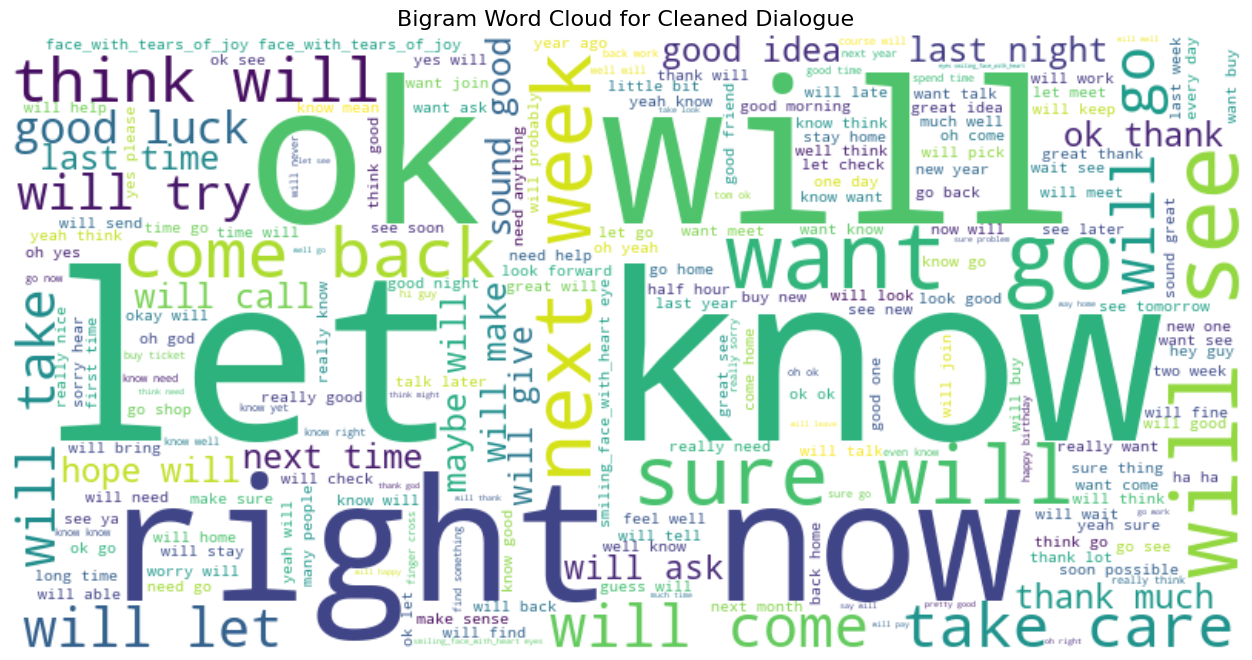

In [23]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Combine all cleaned dialogues into a single string
all_dialogues = " ".join(df["cleaned_dialogue"])

# Define stopwords (convert to list)
stopwords_list = list(STOPWORDS)

# Use CountVectorizer to extract bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words=stopwords_list)
X = vectorizer.fit_transform([all_dialogues])
bigram_freq = X.toarray().sum(axis=0)

# Create a DataFrame of bigrams and their frequencies
bigram_freq_df = pd.DataFrame(bigram_freq, index=vectorizer.get_feature_names_out(), columns=["frequency"])

# Sort bigrams by frequency
bigram_freq_df = bigram_freq_df.sort_values(by="frequency", ascending=False)

# Select the top 200 bigrams for the word cloud
top_bigrams = bigram_freq_df.head(200)

# Generate the bigram word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=200,
    contour_width=1,
    contour_color='steelblue'
).generate_from_frequencies(top_bigrams["frequency"].to_dict())

# Plot the word cloud
plt.figure(figsize=(20, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Bigram Word Cloud for Cleaned Dialogue", fontsize=16)
plt.show()


This code generates a **bigram word cloud** to visualize the most frequent two-word combinations (bigrams) in the cleaned summary text from the DataFrame `df`. First, it combines all the cleaned summaries into a single string and filters out common stopwords using the `STOPWORDS` set. Then, a `CountVectorizer` is used to extract bigrams (two-word combinations) from the text, which are represented by their frequency counts. The bigrams are sorted by frequency, and the top 200 most frequent bigrams are selected for the word cloud. Using the `WordCloud` class, a word cloud is generated based on these frequencies, with a visually appealing 'viridis' colormap and steel blue contours. Finally, the word cloud is displayed without axes, providing a clear and aesthetically pleasing visualization of the most common bigrams in the cleaned summary data. This helps to identify key recurring word pairs or themes in the dataset.

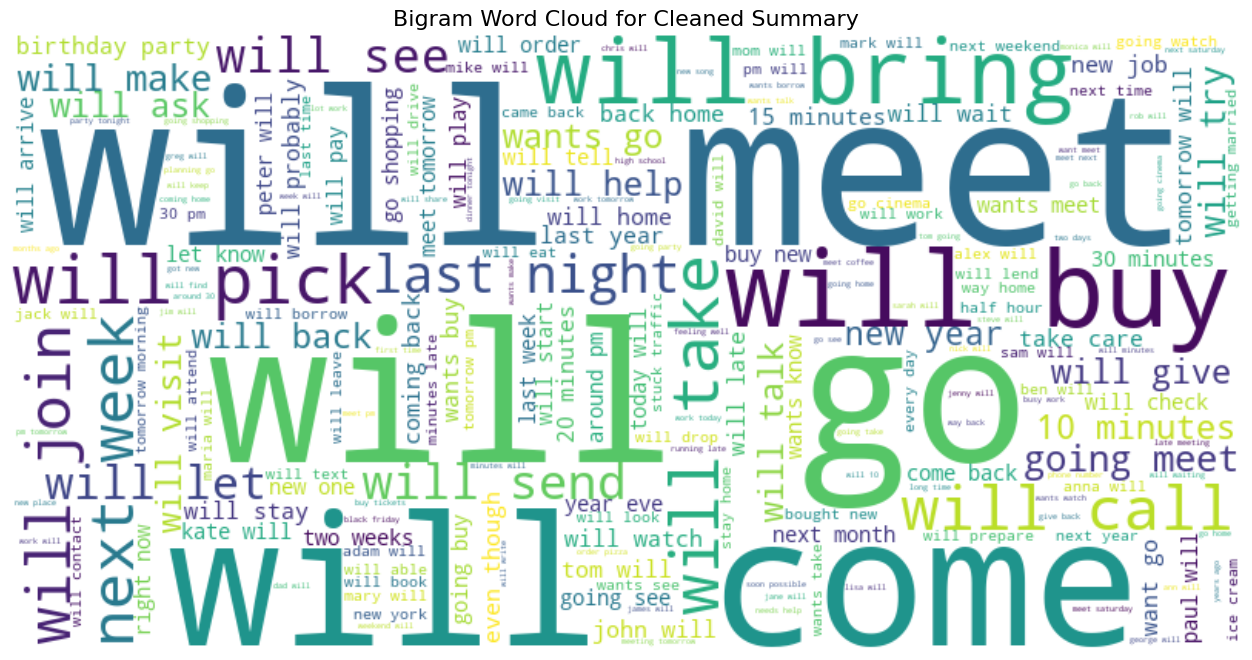

In [24]:
# Combine all cleaned dialogues into a single string
all_dialogues = " ".join(df["cleaned_summary"])

# Define stopwords (convert to list)
stopwords_list = list(STOPWORDS)

# Use CountVectorizer to extract bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words=stopwords_list)
X = vectorizer.fit_transform([all_dialogues])
bigram_freq = X.toarray().sum(axis=0)

# Create a DataFrame of bigrams and their frequencies
bigram_freq_df = pd.DataFrame(bigram_freq, index=vectorizer.get_feature_names_out(), columns=["frequency"])

# Sort bigrams by frequency
bigram_freq_df = bigram_freq_df.sort_values(by="frequency", ascending=False)

# Select the top 200 bigrams for the word cloud
top_bigrams = bigram_freq_df.head(200)

# Generate the bigram word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=200,
    contour_width=1,
    contour_color='steelblue'
).generate_from_frequencies(top_bigrams["frequency"].to_dict())

# Plot the word cloud
plt.figure(figsize=(20, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Bigram Word Cloud for Cleaned Summary", fontsize=16)
plt.show()


-------------------------------------------------

# Abstractive Summarization

Using a pre-trained transformer model like BART

This section uses a pre-trained BART model for summarization from Hugging Face to generate a summary for a sample dialogue. It compares the model's predicted summary with the actual summary from the dataset.

1. **Load pre-trained BART model**: Using `pipeline("summarization")` with `facebook/bart-large-cnn`.
2. **Input example dialogue**: Selects a dialogue from the dataset (`df['cleaned_dialogue'][0]`).
3. **Generate summary**: The model creates a summary with specified length constraints.
4. **Compare with actual summary**: Prints the predicted summary and compares it to the actual one from the dataset.

This helps evaluate the model's performance.

In [25]:
from transformers import pipeline

# Load pre-trained BART model for summarization
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Example dialogue
dialogue = df['cleaned_dialogue'][0]

# Generate summary
summary = summarizer(dialogue, max_length=50, min_length=25, do_sample=False)
print("Predicted Summary", summary[0]['summary_text'] )
print("---------------------------------")
print("Actual Summary", df['cleaned_summary'])

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Your max_length is set to 50, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


Predicted Summary Amanda: I bake cookie do you want some jerry sure amanda I will bring you tomorrow. amanda: Will you bring me a cookie tomorrow? Amanda: Would you like a cookie?
---------------------------------
Actual Summary 0        Amanda baked cookies and will bring Jerry some...
1        Olivia and Olivier are voting for liberals in ...
2        Kim may try the pomodoro technique recommended...
3        Edward thinks he is in love with Bella. Rachel...
4        Sam is confused, because he overheard Rick com...
                               ...                        
14727    Romeo is trying to get Greta to add him to her...
14728    Theresa is at work. She gets free food and fre...
14729    Japan is going to hunt whales again. Island an...
14730    Celia could not make it to the afternoon with ...
14731    Georgia and Juliette are looking for a hotel i...
Name: cleaned_summary, Length: 14731, dtype: object


# Custom Training

Using the above dataset, custom training transformer model : BART



This notebook section walks through fine-tuning a pre-trained BART model (`facebook/bart-large-cnn`) for text summarization. Below is an explanation of the steps and configurations:

---

#### **1. Environment Setup**
- **GPU Check**: Ensures that the model training utilizes GPU if available for faster processing.
- **Device Assignment**: The model and computations are transferred to the appropriate device (`cuda` or `cpu`).

---

#### **2. Loading the Pre-trained Model and Tokenizer**
- The BART model and its tokenizer are loaded using Hugging Face's `from_pretrained` function.
- `facebook/bart-large-cnn` is pre-trained on summarization tasks, making it an ideal starting point.

---

#### **3. Dataset Preparation**
- **Input and Output Texts**: The dataset consists of dialogues (`cleaned_dialogue`) and their respective summaries (`cleaned_summary`).
- **Dataset Conversion**: The data is formatted into a Hugging Face `Dataset` object.

---

#### **4. Splitting Data**
- The dataset is split into training (80%) and evaluation (20%) subsets using the `train_test_split` method.

---

#### **5. Tokenization**
- **Custom Tokenization Function**: Input dialogues and their corresponding summaries are tokenized with:
  - `max_length` constraints for truncation.
  - `padding` for uniform input dimensions.
- Tokenized labels (summaries) are added to the model inputs.

---

#### **6. Training Arguments**
The training process is configured using `TrainingArguments`:
- **Output Directory**: `./results` will store logs and outputs.
- **Evaluation Strategy**: Model is evaluated at the end of each epoch.
- **Learning Rate**: A fine-tuning-friendly value of `2e-5` is chosen.
- **Batch Sizes**: Configured for both training and evaluation phases.
- **Epochs**: Set to 3 for demonstration purposes.
- **Mixed Precision (FP16)**: Enables efficient GPU training.
- **Logging**: Logs are saved in `./logs`.

---

#### **7. Trainer Initialization**
- The Hugging Face `Trainer` is instantiated to:
  - Fine-tune the BART model on the tokenized training dataset.
  - Evaluate the model using the tokenized evaluation dataset.

---

#### **8. Model Training**
- The model is trained using the `Trainer.train()` function, which manages the training loop and GPU optimizations.

This process customizes the BART model for domain-specific summarization, improving its accuracy on dialogue datasets.each component and step in the code.

In [26]:
from transformers import BartForConditionalGeneration, BartTokenizer, Trainer, TrainingArguments
from datasets import Dataset, DatasetDict
import torch

# Check if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load the pre-trained BART model and tokenizer
model = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn").to(device)
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-cnn")

# Prepare your dataset
data = {
    'input_text': df['cleaned_dialogue'].tolist(),
    'output_text': df['cleaned_summary'].tolist()
}
train_dataset = Dataset.from_dict(data)

# Example split: 80% train, 20% eval
split_datasets = train_dataset.train_test_split(test_size=0.2)

# Tokenize the dataset
def tokenize_function(examples):
    model_inputs = tokenizer(examples['input_text'], max_length=1024, truncation=True, padding="max_length")
    labels = tokenizer(examples['output_text'], max_length=150, truncation=True, padding="max_length")
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

# Apply tokenization to both train and eval datasets
tokenized_datasets = {
    "train": split_datasets["train"].map(tokenize_function, batched=True),
    "eval": split_datasets["test"].map(tokenize_function, batched=True)
}

# Define training arguments with GPU support
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    evaluation_strategy="epoch",     # evaluation strategy
    learning_rate=2e-5,              # learning rate
    per_device_train_batch_size=4,   # batch size for training
    per_device_eval_batch_size=8,    # batch size for evaluation
    num_train_epochs=3,              # number of training epochs
    weight_decay=0.01,               # strength of weight decay
    fp16=True,                       # enable mixed precision training for GPU
    save_strategy="no",           # save checkpoints every epoch
    logging_dir='./logs',            # directory for logging
)

# Initialize the Trainer
trainer = Trainer(
    model=model,                              # the instantiated 🤗 Transformers model
    args=training_args,                       # training arguments, defined above
    train_dataset=tokenized_datasets["train"], # tokenized training dataset
    eval_dataset=tokenized_datasets["eval"],   # tokenized evaluation dataset
)

# Train the model
trainer.train()

Using device: cuda


Map:   0%|          | 0/11784 [00:00<?, ? examples/s]

Map:   0%|          | 0/2947 [00:00<?, ? examples/s]

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: monishagt31 (monishagt31-pes-college-of-engineering-mandya). Use `wandb login --relogin` to force relogin


TrainOutput(global_step=8838, training_loss=0.22816571910933256, metrics={'train_runtime': 11288.0636, 'train_samples_per_second': 3.132, 'train_steps_per_second': 0.783, 'total_flos': 7.661148189386342e+16, 'train_loss': 0.22816571910933256, 'epoch': 3.0})

The code saves the fine-tuned BART model and tokenizer to a folder called `./bart_summary_model`. The model and tokenizer will be saved in the current working directory, and a message `"Model saved!"` is printed for confirmation.

In [27]:
model.save_pretrained("./bart_summary_model")
tokenizer.save_pretrained("./bart_summary_model")
print("Model saved!")

Model saved!



In this notebook, we will evaluate the performance of our summarization model using standard metrics. Two important libraries are required for this:

**1.evaluate** : A library from Hugging Face that provides an easy-to-use interface for computing various evaluation metrics, including accuracy, BLEU, ROUGE, and others. We will use this to compute ROUGE scores, a common evaluation metric for text generation tasks.

**2.rouge_score**: A Python package to calculate the ROUGE (Recall-Oriented Understudy for Gisting Evaluation) metrics, which measure the quality of generated text by comparing it to reference summaries.

In [28]:
!pip install evaluate  
!pip install rouge_score

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.4 MB/s eta 0:00:00


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=ec7b83d27f18a10c886575f2b24e0798ac6c5ebe5a7fcb1d17cff32029f3246f
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


# Metrics



1. **Load the ROUGE Metric**: 
   - The `evaluate` library is imported and the ROUGE metric is loaded using `evaluate.load("rouge")` to assess the quality of generated summaries.

2. **Generate Predictions for the Test Set**:
   - The code initializes two lists, `generated_summaries` and `reference_summaries`, to store the model-generated summaries and the reference summaries from the dataset.

3. **Iterate Over Evaluation Dataset**:
   - It iterates through the evaluation data, decoding both the input texts and reference summaries from token IDs to text.

4. **Generate Model Summaries**:
   - The input text is tokenized, passed to the BART model, and a summary is generated using beam search with specific length parameters (`max_length`, `min_length`, `num_beams`).

5. **Store Summaries**: 
   - The generated summaries are appended to `generated_summaries`, and the reference summaries to `reference_summaries`.

6. **Compute ROUGE Scores**:
   - ROUGE scores are computed using `rouge.compute()` by comparing the generated summaries to the reference summaries.

7. **Display ROUGE Scores**: 
   - The ROUGE scores (ROUGE-1, ROUGE-2, ROUGE-L) are printed to evaluate the performance of the model's summaries.

In [29]:
import evaluate

rouge = evaluate.load("rouge")

# Generate predictions for the test set
generated_summaries = []
reference_summaries = []

for example in tokenized_datasets['eval']:
    input_text = tokenizer.decode(example['input_ids'], skip_special_tokens=True)
    reference_summary = tokenizer.decode(example['labels'], skip_special_tokens=True)
    
    # Generate summary
    inputs = tokenizer(input_text, max_length=1024, truncation=True, return_tensors="pt").to(device)
    summary_ids = model.generate(inputs["input_ids"], max_length=150, min_length=30, num_beams=4)
    generated_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    # Store generated and reference summaries
    generated_summaries.append(generated_summary)
    reference_summaries.append(reference_summary)

# Compute ROUGE scores
results = rouge.compute(predictions=generated_summaries, references=reference_summaries)

# Display ROUGE scores
print("ROUGE Scores:")
for key, value in results.items():
    print(f"{key}: {value}")

ROUGE Scores:
rouge1: 0.47017536533074805
rouge2: 0.23210698630391657
rougeL: 0.36908196963214956
rougeLsum: 0.36916697156243894


# Final Summarization



1. **Import Libraries**: 
   - The `BartForConditionalGeneration` and `BartTokenizer` classes from the `transformers` library are imported to load the fine-tuned BART model and tokenizer.
   - `torch` is imported to check the availability of GPU and move the model to the appropriate device.

2. **Check GPU Availability**: 
   - The code checks if a GPU is available by using `torch.cuda.is_available()`. 
   - It sets the `device` to "cuda" if a GPU is available, otherwise defaults to "cpu". This ensures that the model runs on GPU if possible, speeding up the inference process.

3. **Print Device**: 
   - The chosen device (either GPU or CPU) is printed to confirm the runtime environment.

4. **Load Fine-tuned Model and Tokenizer**: 
   - The fine-tuned BART model is loaded from the saved directory `./bart_summary_model` using `from_pretrained()` and moved to the chosen device (GPU or CPU).
   - The tokenizer is loaded in the same manner to ensure proper tokenization of input data when generating summaries.he model's summaries.

In [31]:
from transformers import BartForConditionalGeneration, BartTokenizer
import torch

# Check if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load the fine-tuned BART model and tokenizer
model = BartForConditionalGeneration.from_pretrained("./bart_summary_model").to(device)
tokenizer = BartTokenizer.from_pretrained("./bart_summary_model")

Using device: cuda




1. **Test Dialogue**: 
   - A sample dialogue `test_dialogue` is provided, which contains a conversation between Amanda and Jerry.

2. **Tokenization**:
   - The `test_dialogue` is tokenized using the `tokenizer`, with a maximum sequence length of 1024 tokens. This ensures the input fits within the model’s input size.
   - The `truncation=True` ensures that any input longer than 1024 tokens is truncated.
   - The `return_tensors="pt"` option returns the tokenized input in PyTorch tensor format, which is necessary for the model to process it.

3. **Move Inputs to Device**:
   - The tokenized inputs (like `input_ids`) are moved to the chosen device (`GPU` or `CPU`) to match where the model is located. This allows for efficient processing.

4. **Generate Summary**:
   - The model is used to generate a summary of the input dialogue using the `model.generate()` function. 
   - The function parameters control the length and diversity of the generated summary:
     - `max_length=50` limits the summary to a maximum of 50 tokens.
     - `min_length=25` ensures the summary has at least 25 tokens.
     - `length_penalty=2.0` applies a penalty to longer summaries to avoid generating summaries that are too lengthy.
     - `num_beams=4` specifies the number of beams for beam search, a technique to explore different possible summary outputs and select the best one.

5. **Decode and Print the Summary**:
   - The generated summary is decoded from token IDs back into human-readable text using the tokenizer's `decode()` method.
   - The `skip_special_tokens=True` ensures that special tokens (such as padding tokens) are omitted from the decoded output.
   - Finally, the generated summary is printed.

**Expected Output**: This code will generate a summary of the given test dialogue and print it.

In [37]:
from transformers import BartForConditionalGeneration, BartTokenizer
import torch

# Device setup
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load fine-tuned BART model and tokenizer
model = BartForConditionalGeneration.from_pretrained("./bart_summary_model").to(device)
tokenizer = BartTokenizer.from_pretrained("./bart_summary_model")

# Input dialogue
test_dialogue = (
    "Amanda: Hey Jerry, I just baked some cookies! Want to try them?\n"
    "Jerry: Oh, sure Amanda! That would be great.\n"
    "Amanda: I'll bring them to you tomorrow at the office."
)

# Tokenize the input
inputs = tokenizer(test_dialogue, max_length=1024, truncation=True, return_tensors="pt")
inputs = {key: val.to(device) for key, val in inputs.items()}
print("Tokenized Input:", tokenizer.decode(inputs["input_ids"][0], skip_special_tokens=True))

# Generate summary
summary_ids = model.generate(
    inputs["input_ids"],
    max_length=50,
    min_length=10,
    length_penalty=1.5,
    num_beams=4,
    no_repeat_ngram_size=2
)
generated_summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Output
print("Generated Summary:", generated_summary)


Using device: cuda
Tokenized Input: Amanda: Hey Jerry, I just baked some cookies! Want to try them?
Jerry: Oh, sure Amanda! That would be great.
Amanda: I'll bring them to you tomorrow at the office.
Generated Summary: Amanda baked some cookies and will bring them to Jerry tomorrow at the office.


In [38]:
import shutil

# Path to the model directory
model_dir = '/kaggle/working/bart_summary_model'

# Path where the zip file will be saved
zip_file_path = '/kaggle/working/bart_summary_model.zip'

# Create a zip file of the model directory
shutil.make_archive(zip_file_path.replace('.zip', ''), 'zip', model_dir)

print(f'Model saved as a zip file: {zip_file_path}')


Model saved as a zip file: /kaggle/working/bart_summary_model.zip
